# Assignment 2 - Question 4
The objective of this assignment is to get you familiarize with  the  problem  of  `Linear Regression`.

## Instructions
- Write your code and analysis in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of other cells.
- No inbuilt functions to be used until specified

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>_Q4.ipynb`.
- Fill the Name and Roll number in the below markdown

Name:P Shiridi Kumar <br>
Roll Number: 2021121005

## Background about the dataset

TLDR: You have 4 independent variables (`float`) for each molecule. You can use a linear combination of these 4 independent variables to predict the bandgap (dependent variable) of each molecule.

You can read more about the problem in [Li et al, Bandgap tuning strategy by cations and halide ions of lead halide perovskites learned from machine learning, RSC Adv., 2021,11, 15688-15694](https://doi.org/10.1039/D1RA03117A).

In [1]:
import csv
import random
import numpy as np

In [2]:
all_molecules = list()

with open('bg_data.txt', 'r') as infile:
    input_rows = csv.DictReader(infile)
    
    for row in input_rows:
        current_mol = ([float(row['Cs']), float(row['FA']), float(row['Cl']), float(row['Br'])], float(row['Bandgap']))
        all_molecules.append(current_mol)

random.shuffle(all_molecules)


num_train = int(len(all_molecules) * 0.8)

# each point in x_train has 4 values - 1 for each feature
x_train = [x[0] for x in all_molecules[:num_train]]
# each point in y_train has 1 value - the bandgap of the molecule
y_train = [x[1] for x in all_molecules[:num_train]]

x_test = [x[0] for x in all_molecules[num_train:]]
y_test = [x[1] for x in all_molecules[num_train:]]

### 4.1 Implement a Linear Regression model that minimizes the MSE **without using any libraries**. You may use NumPy to vectorize your code, but *do not use numpy.polyfit* or anything similar.

4.1.1 Explain how you plan to implement Linear Regression in 5-10 lines.

A 4.1.1) Linear regression can be implemented by finding a line quation which best fit the training sample and could be generalized to any data make predictions . In order to find the best fit line we can follow gradient descent optimization by taking the loss function as MSE(i.e, the mean square of the difference between the predicted and actual points) as we iteratively update the weights , the algorithm might eventually converge and the final weights and bias are used as the coefficients of the line equation.

4.1.2 Implement Linear Regression using `x_train` and `y_train` as the train dataset.

4.1.2.1 Choose the best learning rate and print the learning rate for which you achieved the best MSE.

In [9]:
import math
class LinearRegression:

  def __init__(self,lr=0.1,maxiter=1000):
    self.lr=lr
    self.maxiter=maxiter

  def fit(self,xtrain,ytrain):

    self.xtrain=xtrain
    self.ytrain=ytrain

    self.padx()
    params=self.init_params(xtrain)
    self.params=params
    self.GradientDescent()
    return self.params
  
  def getparams(self):
    return self.params
  
  def padx(self):
    bias=np.ones(len(self.xtrain))
    bias=bias.reshape(len(self.xtrain),1)
    self.xtrain=np.concatenate((self.xtrain,bias),axis=1)
  
  def concatenate(self,vals):
    bias=np.ones(len(vals))
    bias=bias.reshape(len(vals),1)
    vals=np.concatenate((vals,bias),axis=1)
    return vals
    
  def init_params(self,xtrain):
    params=np.random.randn(len(self.xtrain[0]), 1)
    return params
  
  def predict(self,xtest):
    xtest=np.array(xtest)
    if(xtest.shape[1]!=self.params.shape[0]):
      xtest=self.concatenate(xtest)
    if(xtest.ndim!=2):
      raise ValueError("Expected 2D array found 1D array")
    return sum(xtest.T*self.params)
  
  def calc_loss(self,output):
    dz=sum((1/len(self.ytrain))*((output-self.ytrain)**2).reshape(-1,1))
    return dz

  def update_weights(self,outputs):
    dz=(outputs-self.ytrain).reshape(-1,1)
    self.params-=self.lr*(1/len(self.xtrain))*sum(self.xtrain*dz).reshape(-1,1)

  
  def GradientDescent(self):
    for i in range(self.maxiter):
      h_x=sum((self.xtrain*self.params.T).T)
      # print(h_x.shape)
      self.calc_loss(h_x)
      self.update_weights(h_x)



4.1.3 Make a [Parity Plot](https://en.wikipedia.org/wiki/Parity_plot) of your model's bandgap predictions on the test set with the actual values.

Best value of learning rate which gave best RMSE most of the times =  0.1 
RMSE : 0.05816571957699275


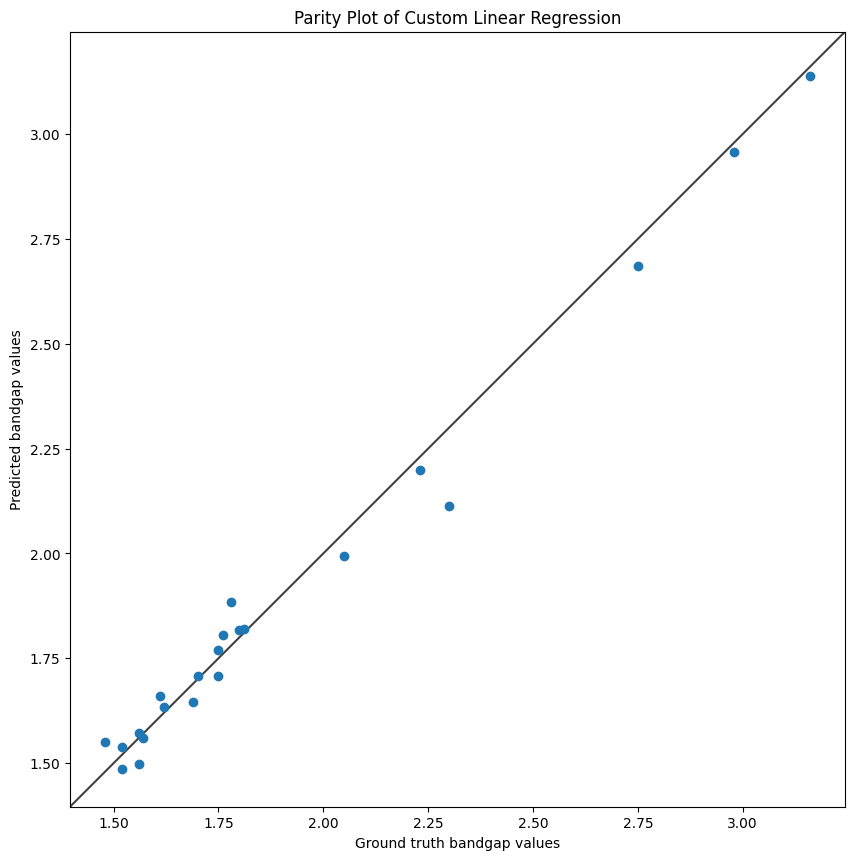

In [10]:
# Get the predictions of x_test into `y_pred`

#
# ...
#

def calc_mse(ypred,ytest):
  return math.sqrt(sum((ypred-ytest)**2)/len(ypred))
# for i in range(5,100,5):
model=LinearRegression(lr=0.1,maxiter=1000)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print("Best value of learning rate which gave best RMSE most of the times = ",0.1,"\nRMSE :",calc_mse(y_pred,y_test))

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,20))

ax.scatter(y_test, y_pred)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

ax.set_title('Parity Plot of Custom Linear Regression')
ax.set_xlabel('Ground truth bandgap values')
ax.set_ylabel('Predicted bandgap values')
plt.show()

### 4.2 Implement Ridge regression
4.2.1 Explain Ridge regression briefly in 1-2 lines.

<!-- Your answer to 1.2.1 -->
A 4.2.1) Many a times the model might tend to overfit because of complex weights . Ridge regression adds the sum of the square of the weights to the loss function and because of which the gradient descent algorithm tries to update the weights in such a way that the magnitude of the weights is as low as possible and have a simpler model.

4.2.2 Implement Ridge regression and make a table of different RMSE scores you achieved with different values of alpha. What does the parameter `alpha` do? How does it affect the results here? Explain in 5-10 lines in total. (You can use scikit-learn from this cell onwards)

A 4.2.2) the parameter alpha controls the effect of the of the sum of the squares of the weights added to the loss function . Alpha is multipled with the sum of the sqaures of the weights and added to loss function. So ideally when alpha is =0 then the effect of the term would be 0 and the loss function woudld be same as the normal linear regression and in this case ridge regression performs similar to linear regression. 
We can infer the same from the below table as well . when the alpha value is very low or 0 its rmse is similar to linear regression in the above section as alpha increases the effect of the sum of the squares of the weights increases in loss function and hence by the algorithm eventually tries to decrease the magnitude of the weights as less as possible . so ideally in most of the cases as alpha increases the sum of the squares of the weights also decreases and we can infer the same from the below table .

In [11]:
# you should not have imported sklearn before this point

import sklearn
from sklearn.linear_model import Ridge
import pandas as pd
table=[]
for i in range(0,205,5):
  alp=0.01*i
  model = Ridge(alpha=alp)
  model.fit(x_train, y_train)
  y_pred=model.predict(x_test)
  table.append((round(alp,2),calc_mse(y_pred,y_test),sum((model.coef_)**2)))
table=pd.DataFrame(table,columns=["Alpha value", "RMSE","Sum of squares of the coeffecients"])
table


# implement Ridge regression and make a table where you explore the effect of different values of `alpha`

,Alpha value,RMSE,Sum of squares of the coeffecients
0,0.00,0.061122,2.706003
1,0.05,0.062936,2.645406
2,0.10,0.064942,2.587080
3,0.15,0.067106,2.530911
4,0.20,0.069395,2.476788
5,0.25,0.071784,2.424610
6,0.30,0.074249,2.374281
7,0.35,0.076772,2.325712
8,0.40,0.079335,2.278818
9,0.45,0.081926,2.233519


### 4.3 Implement Lasso regression
4.3.1 Explain Lasso regression briefly in 1-2 lines.

A 4.3.1) As same like ridge regression lasso regression also helps to prevent from overfitting but instead of adding sum of squares of weights lasso regression adds sum of absolute values of weights . this might eventually make the weights to zero and hence by only some weights might be used and makes the model more simples and prevent from overfit.

4.3.2 Implement Lasso regression and make a table of different RMSE scores you achieved with different values of alpha. What does the parameter `alpha` do? How does it affect the results here? Explain in 5-10 lines in total.

A 4.3.2) the parameter alpha controls the effect of the of the sum of the absolute values  of the weights added to the loss function . Alpha is multipled with the sum of the absolute values of the weights and added to loss function. So ideally when alpha is =0 then the effect of the term would be 0 and the loss function woudld be same as the normal linear regression and in this case ridge regression performs similar to linear regression. We can infer the same from the below table as well . when the alpha value is very low or 0 its rmse is similar to linear regression in the above section .as alpha increases the loss function gives higher importance to the added term and eventually tries to decrease the value of the term as low as possible since the weight values are not scared it might be eventually become 0 at a faster rate as alpha increases.

In [12]:
# implement Lasso regression and make a table where you explore the effect of different values of `alpha`
from sklearn import linear_model

table=[]
for i in range(0,205,5):
  alp=0.01*i
  model = linear_model.Lasso(alpha=alp)
  model.fit(x_train, y_train)
  y_pred=model.predict(x_test)
  table.append((round(alp,2),calc_mse(y_pred,y_test),sum(abs(model.coef_))))
table=pd.DataFrame(table,columns=["Alpha value", "RMSE","Sum of absolute value of the coeffecients"])
table

/tmp/ipykernel_21003/3751943050.py:8: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  model.fit(x_train, y_train)
/home/shiridi/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/shiridi/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.627e-01, tolerance: 1.720e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


,Alpha value,RMSE,Sum of absolute value of the coeffecients
0,0.00,0.061122,2.297297
1,0.05,0.299634,0.823633
2,0.10,0.474756,0.006631
3,0.15,0.476016,0.000000
4,0.20,0.476016,0.000000
5,0.25,0.476016,0.000000
6,0.30,0.476016,0.000000
7,0.35,0.476016,0.000000
8,0.40,0.476016,0.000000
9,0.45,0.476016,0.000000
